In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import xgboost as xgb
import plotly.express as px
import shap
!pip install chardet
from scipy.stats import ttest_ind, ttest_rel, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
import chardet

with open('/content/Global_Education.csv', 'rb') as f:
    raw_data = f.read(100000)
    result = chardet.detect(raw_data)

print("Detected encoding:", result['encoding'])


Detected encoding: ISO-8859-1


In [7]:
df = pd.read_csv('/content/Global_Education.csv', encoding=result['encoding'])

1.Global Education Enrollment

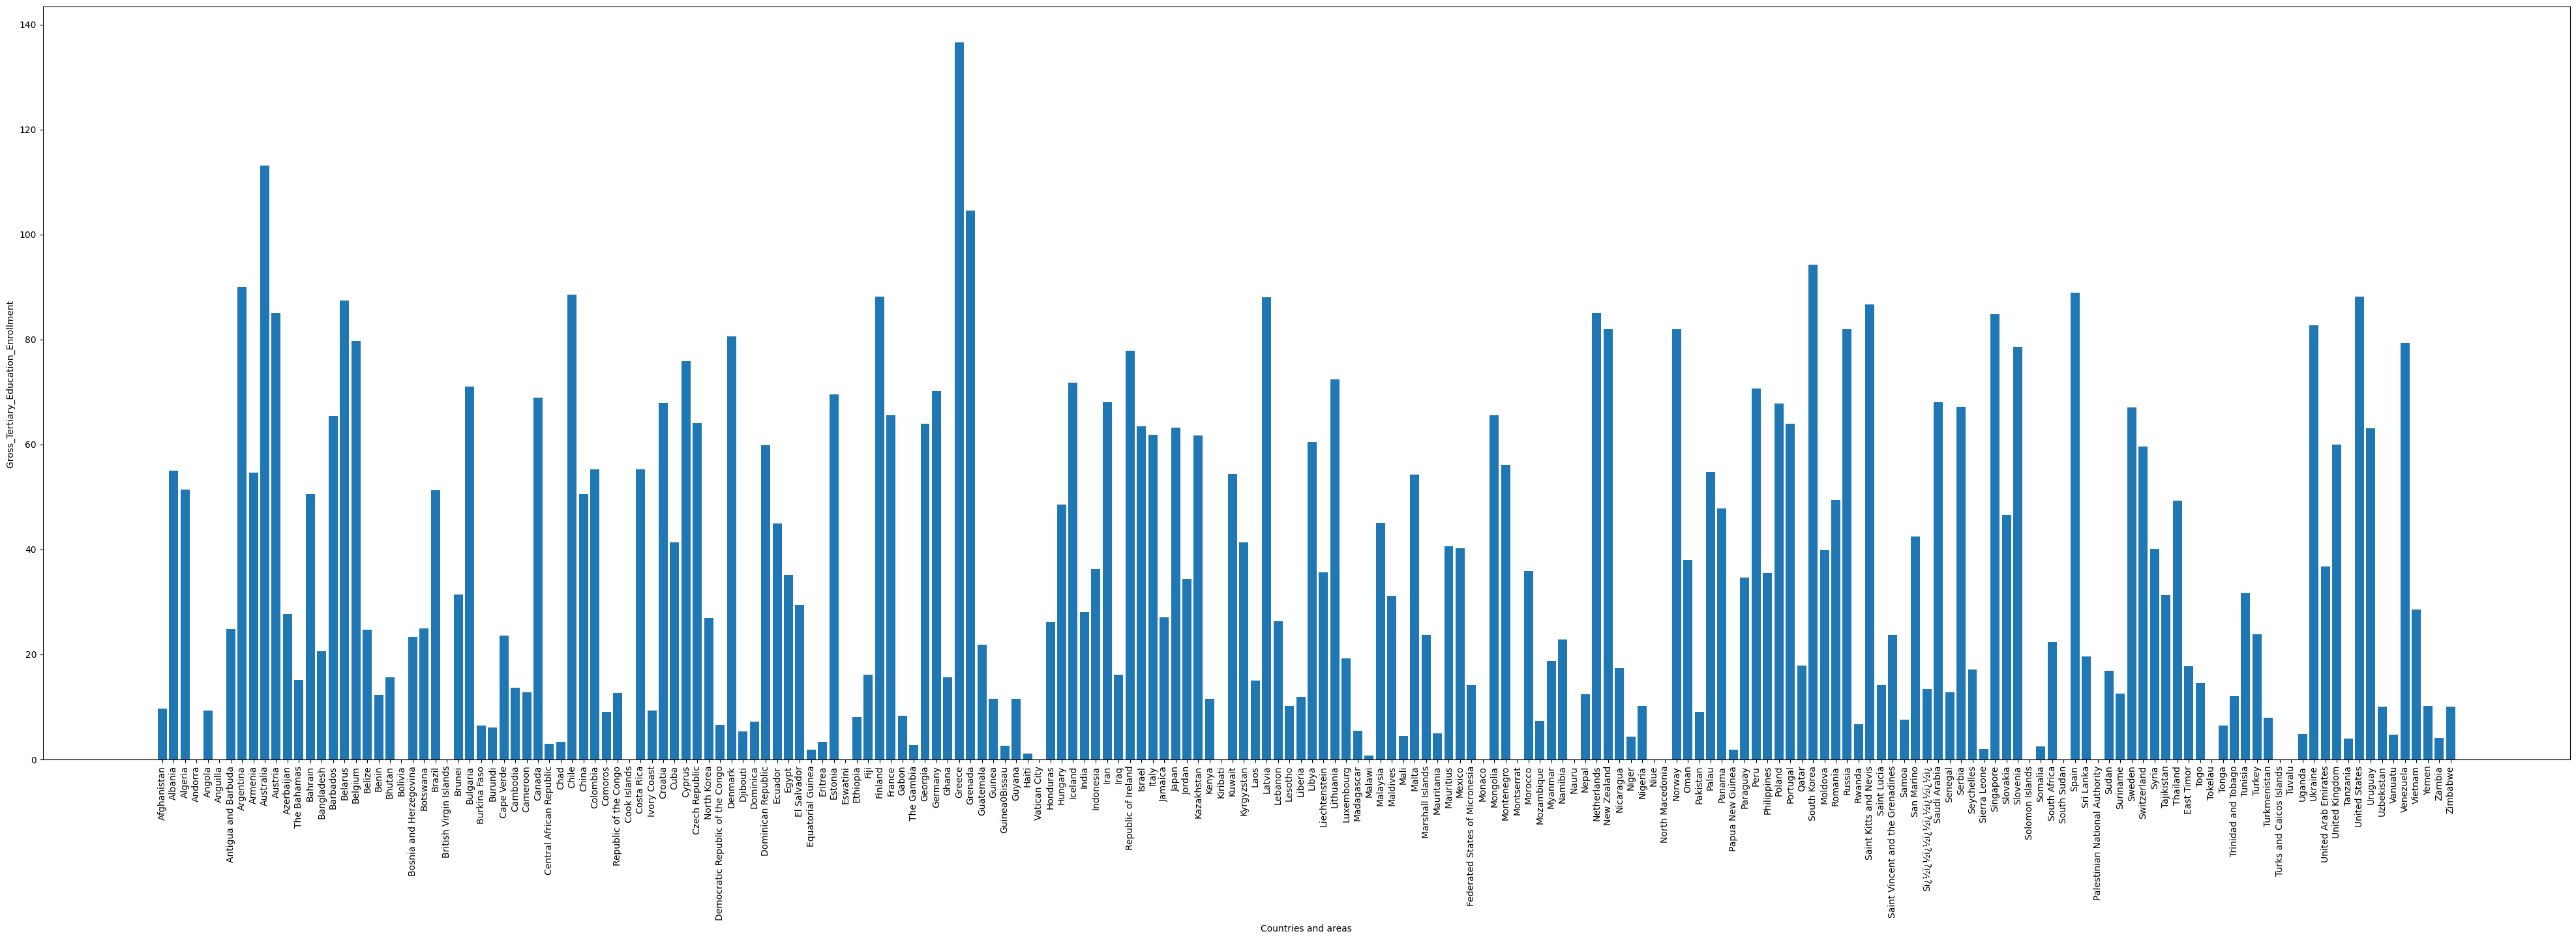

In [ ]:
plt.figure(figsize=(50,15))
plt.bar(df['Countries and areas'],df['Gross_Tertiary_Education_Enrollment'])
plt.xticks(rotation=90)
plt.xlabel("Countries and areas")
plt.ylabel("Gross_Tertiary_Education_Enrollment ")
plt.show()

2.Completion Rates Over Different Education Levels in Different countries

In [ ]:
completion_columns = ['Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
                      'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female',
                      'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female']
fig = px.line(df, x='Countries and areas', y=completion_columns,
              title='Completion Rates Over Different Education Levels')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

3.Education Rate of Males and Females upto Higher Secondary by Countries

In [ ]:
fig=px.bar(df,x='Countries and areas',y=['Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female'],title='Education Rate of Males and Females upto Higher Secondary by Countries')
fig.update_layout(xaxis_tickangle=-40,height=500)
fig.show()

4.Out of school at Primary Education

In [ ]:
fig=px.bar(df,x='Countries and areas',y=['OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female'],title='Out Of Primary Schools Rates')
fig.update_layout(xaxis_tickangle=-40,height=500)
fig.show()

5.Out of Secondary Education

In [ ]:
fig=px.bar(df,x='Countries and areas',y=['OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female'],title='Out Of School Secondary Rates ')
fig.update_layout(xaxis_tickangle=-40,height=500)
fig.show()

6.T-Test of Completion of Male and Female of Higher Secondary Education

In [ ]:
male_completion = df['Completion_Rate_Upper_Secondary_Male']
female_completion = df['Completion_Rate_Upper_Secondary_Female']
t_statistic, p_value = ttest_ind(male_completion, female_completion)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('The difference is statistically significant.')
else:
    print('The difference is not statistically significant.')

T-Statistic: -0.1312743507842733
P-Value: 0.8956239525186745
The difference is not statistically significant.


7.Completion of Higher Secondary of Male VS Unemployment rate

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

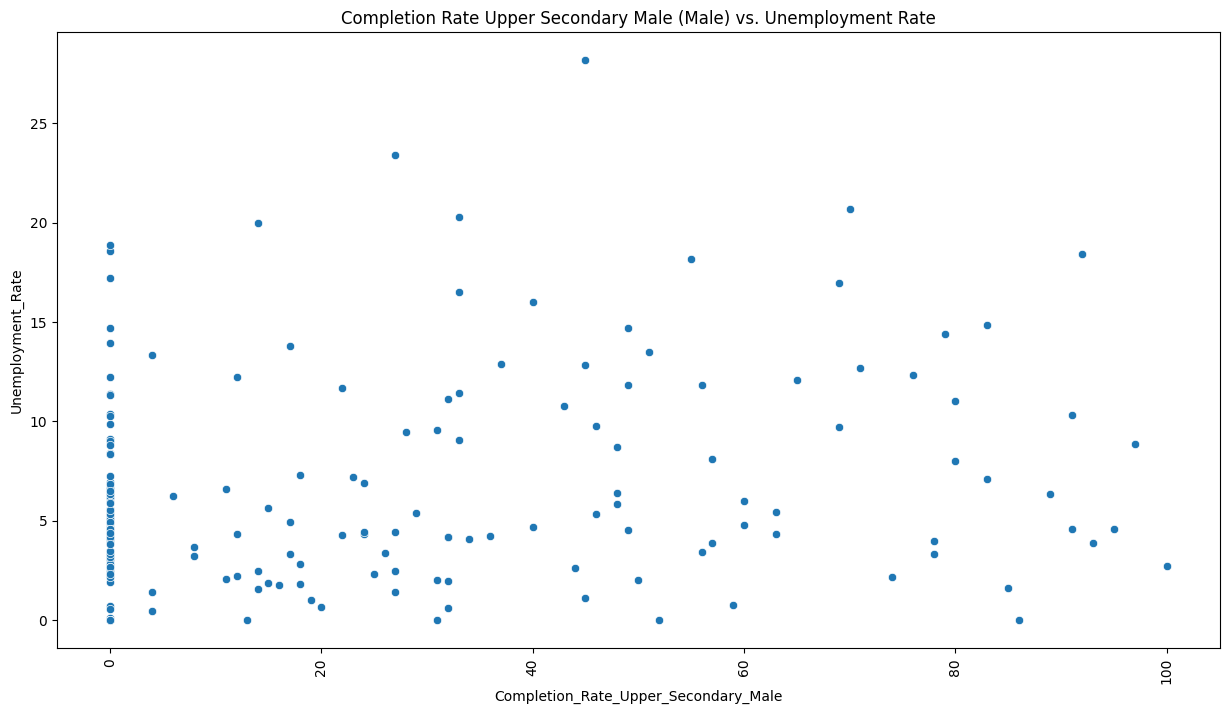

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Completion_Rate_Upper_Secondary_Male', y='Unemployment_Rate')
plt.title('Completion Rate Upper Secondary Male (Male) vs. Unemployment Rate')
plt.xticks(rotation=90)

8.Completion of Higher Secondary of Female VS Unemployment rate

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

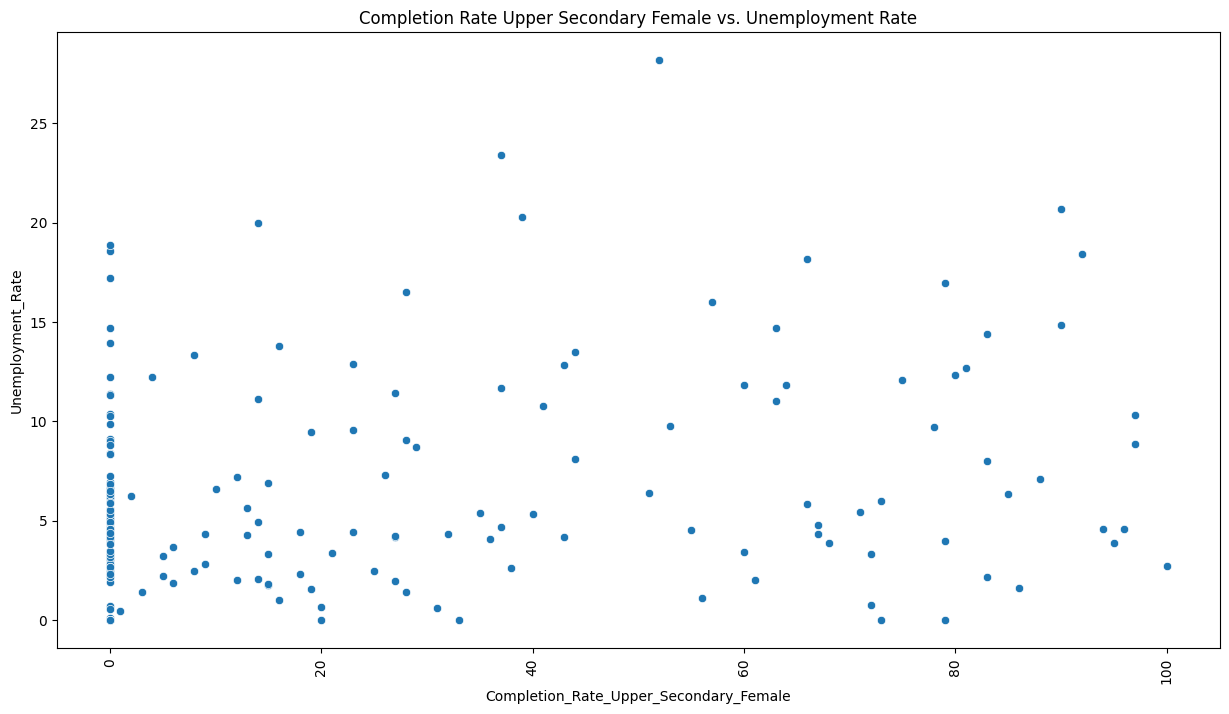

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Completion_Rate_Upper_Secondary_Female', y='Unemployment_Rate')
plt.title('Completion Rate Upper Secondary Female vs. Unemployment Rate')
plt.xticks(rotation=90)

9.Unemployment Rate by Countries

<ipython-input-25-ad8057c25953>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




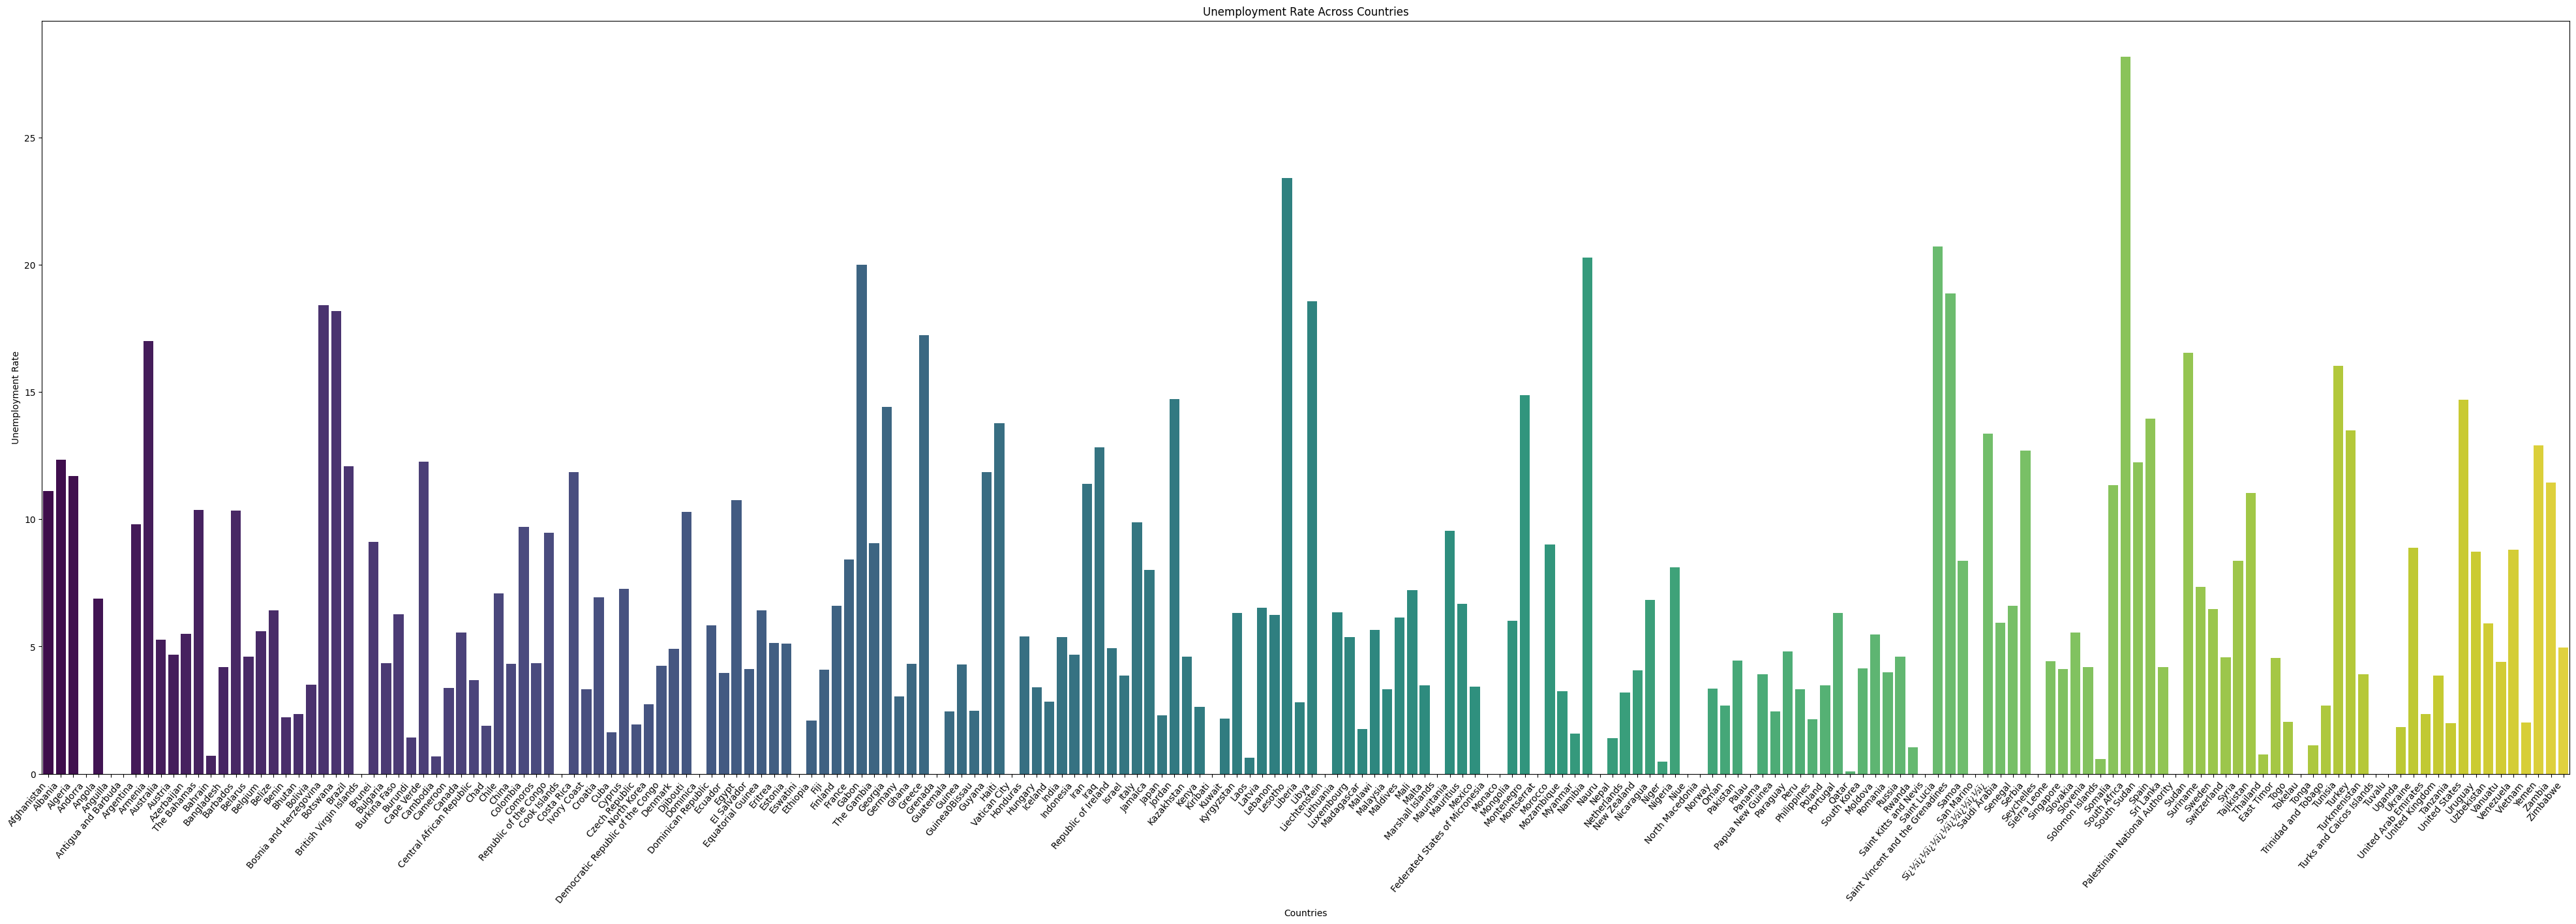

In [ ]:
plt.figure(figsize=(50,15))
sns.barplot(x='Countries and areas', y='Unemployment_Rate', data=df, palette='viridis')
plt.title('Unemployment Rate Across Countries')
plt.xlabel('Countries')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=50, ha='right')

plt.show()

10.Education Rate Vs Unemplyment

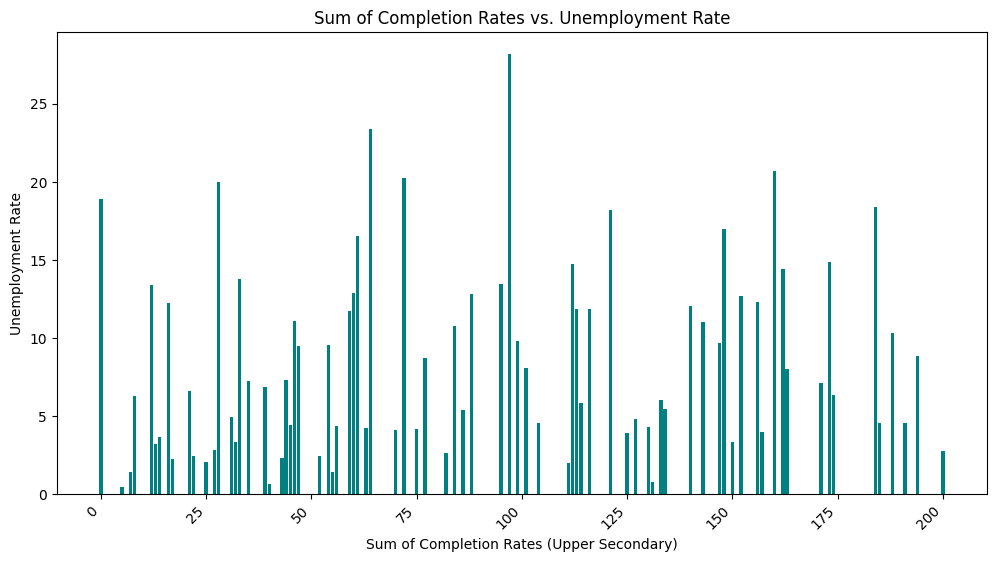

In [ ]:
df['Total_Completion_Rate_Upper_Secondary'] = df['Completion_Rate_Upper_Secondary_Male'] + df['Completion_Rate_Upper_Secondary_Female']

df.sort_values(by='Total_Completion_Rate_Upper_Secondary', inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(df['Total_Completion_Rate_Upper_Secondary'], df['Unemployment_Rate'], color='teal')
plt.title('Sum of Completion Rates vs. Unemployment Rate')
plt.xlabel('Sum of Completion Rates (Upper Secondary)')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45, ha='right')

plt.show()

11.Relationship between Education and Unemployment

In [ ]:
df['Total_Completion_Rate_Upper_Secondary'] = df['Completion_Rate_Upper_Secondary_Male'] + df['Completion_Rate_Upper_Secondary_Female']

X = sm.add_constant(df['Total_Completion_Rate_Upper_Secondary'])
y = df['Unemployment_Rate']

model = sm.OLS(y, X).fit()

coefficients_and_pvalues = pd.DataFrame({'Coefficient': model.params, 'P-value': model.pvalues})
print(coefficients_and_pvalues)

alpha = 0.05
significant_relationship = any(coefficients_and_pvalues['P-value'] < alpha)

if significant_relationship:
    print("\nThere is a statistically significant relationship between education and unemployment.")
else:
    print("\nThe relationship between education and unemployment is not statistically significant.")

                                       Coefficient       P-value
const                                     4.859201  1.721603e-21
Total_Completion_Rate_Upper_Secondary     0.024934  6.152914e-05

There is a statistically significant relationship between education and unemployment.


12.Tertiary Enrollment & Unemployment

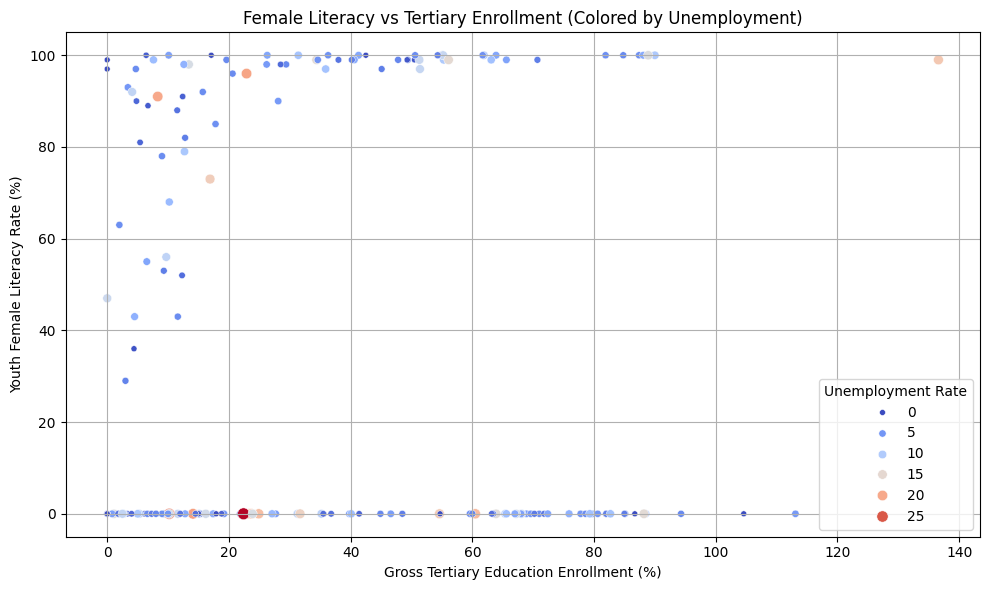

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Gross_Tertiary_Education_Enrollment', y='Youth_15_24_Literacy_Rate_Female', hue='Unemployment_Rate', size='Unemployment_Rate', palette='coolwarm')
plt.title('Female Literacy vs Tertiary Enrollment (Colored by Unemployment)')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Youth Female Literacy Rate (%)')
plt.legend(title='Unemployment Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

13.World Map: Primary Completion Rate by Country

In [ ]:
fig = px.choropleth(df,
                    locations='Countries and areas',
                    locationmode='country names',
                    color='Completion_Rate_Primary_Female',
                    color_continuous_scale='Plasma',
                    title='Female Primary Completion Rate by Country')
fig.show()

14.PCA for Dimensionality Reduction and Visualization

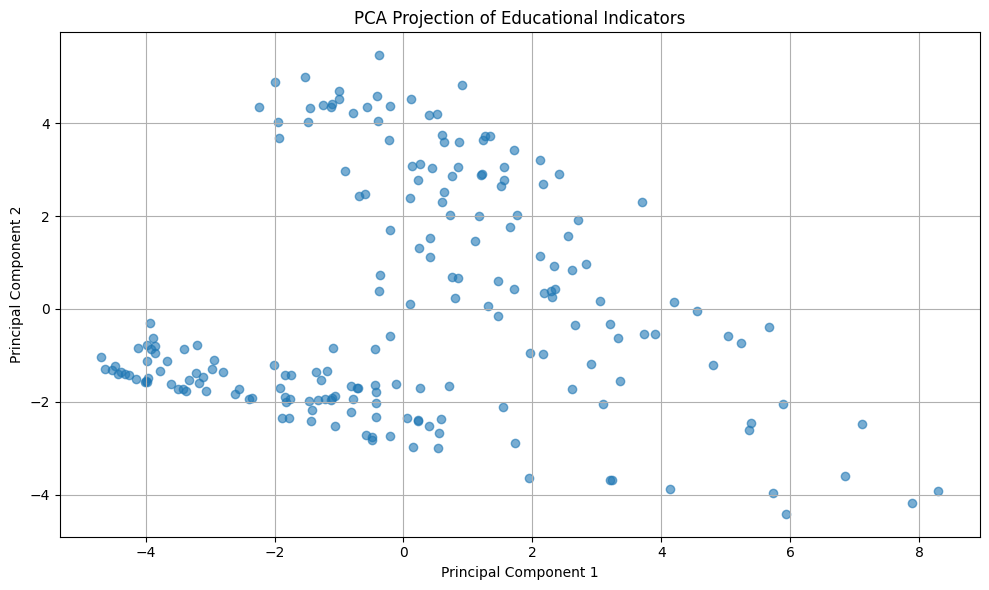

In [ ]:
columns_to_drop = ['Latitude', 'Longitude']
numeric_data = df.select_dtypes(include=['float64', 'int64'])
edu_data = numeric_data.drop(columns=[col for col in columns_to_drop if col in numeric_data.columns])

# Standardize the data
edu_scaled = StandardScaler().fit_transform(edu_data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(edu_scaled)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title('PCA Projection of Educational Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

15.Correlation Between Proficiency and Literacy Rates

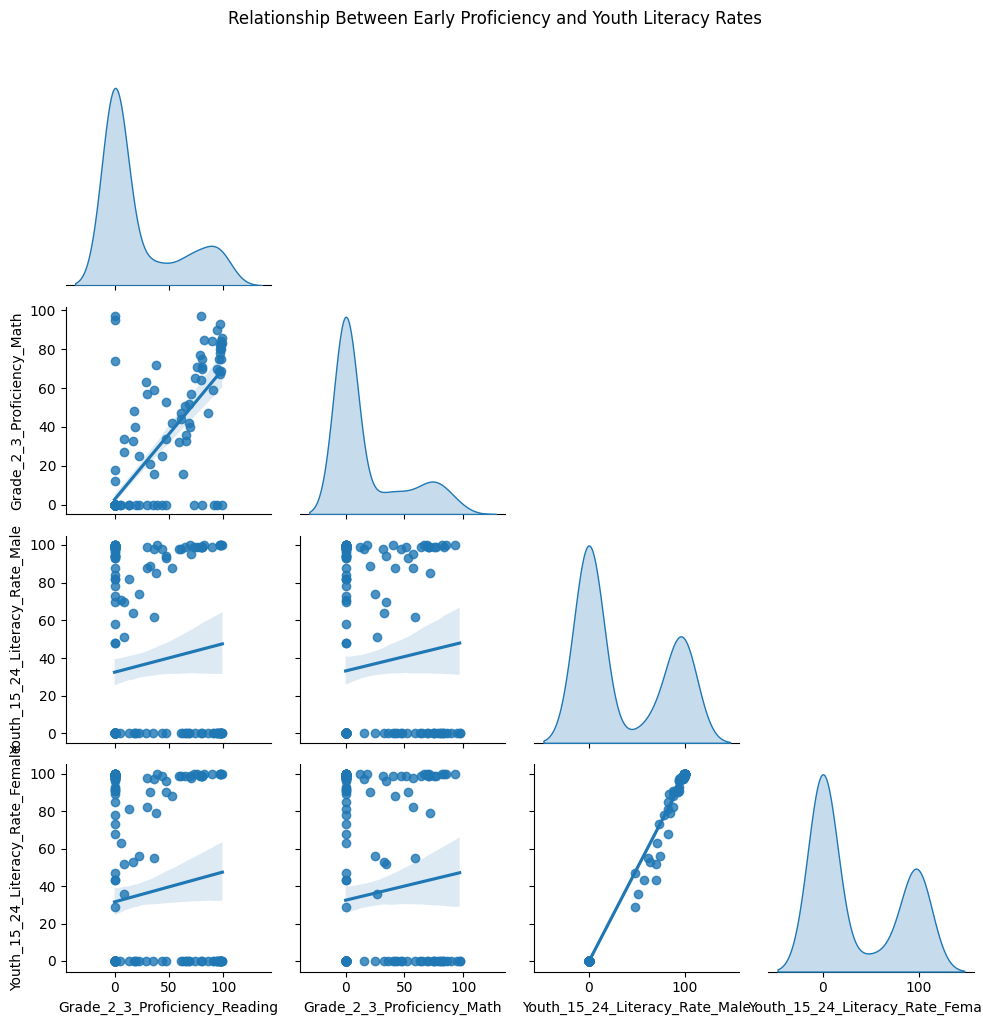

In [ ]:
proficiency_vs_literacy = df[['Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
                              'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']]

sns.pairplot(proficiency_vs_literacy, kind='reg', diag_kind='kde', corner=True)
plt.suptitle('Relationship Between Early Proficiency and Youth Literacy Rates', y=1.02)
plt.tight_layout()
plt.show()


16. Heatmap of Gender Education Disparities

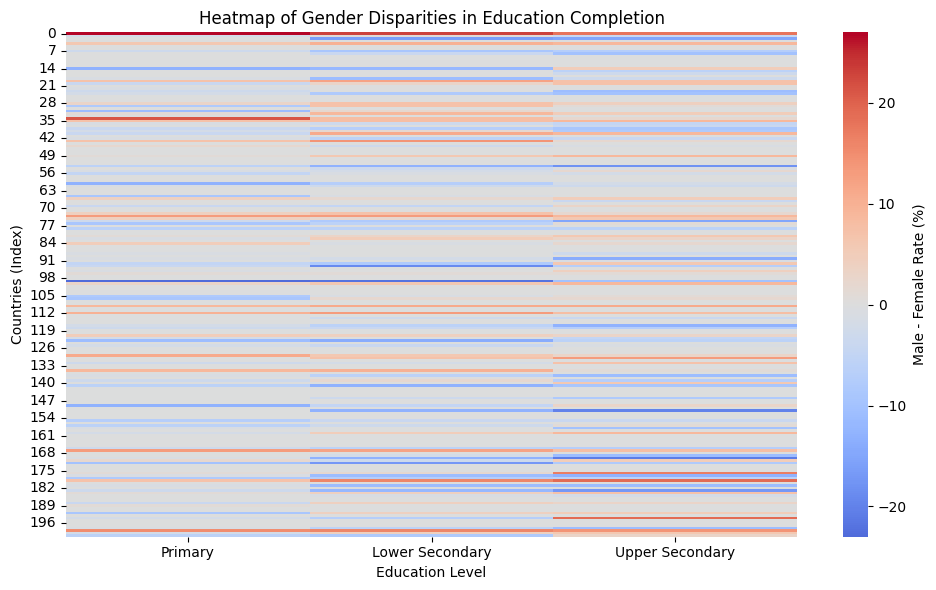

In [ ]:
gender_gap_matrix = df[['Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
                        'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female',
                        'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female']]

disparities = gender_gap_matrix.iloc[:, ::2].values - gender_gap_matrix.iloc[:, 1::2].values
disparity_df = pd.DataFrame(disparities, columns=['Primary', 'Lower Secondary', 'Upper Secondary'])

plt.figure(figsize=(10,6))
sns.heatmap(disparity_df, cmap="coolwarm", center=0, cbar_kws={'label': 'Male - Female Rate (%)'})
plt.title("Heatmap of Gender Disparities in Education Completion")
plt.xlabel("Education Level")
plt.ylabel("Countries (Index)")
plt.tight_layout()
plt.show()

17. Correlation with Unemployment Rate

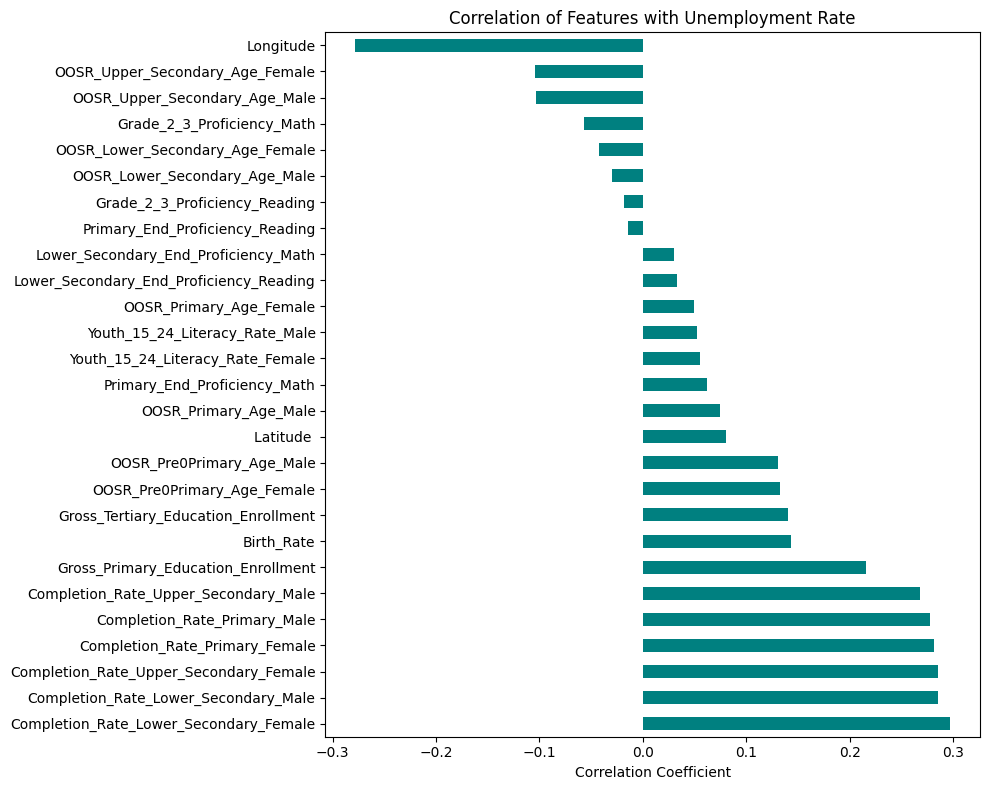

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

if 'Unemployment_Rate' in numeric_df.columns:
    correlation_with_unemployment = numeric_df.corr()['Unemployment_Rate'].drop('Unemployment_Rate')
    correlation_with_unemployment.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), color='teal')

    plt.title('Correlation of Features with Unemployment Rate')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Unemployment_Rate' is not numeric or not found in the dataset.")

18. Feature Importance via Random Forest Regressor

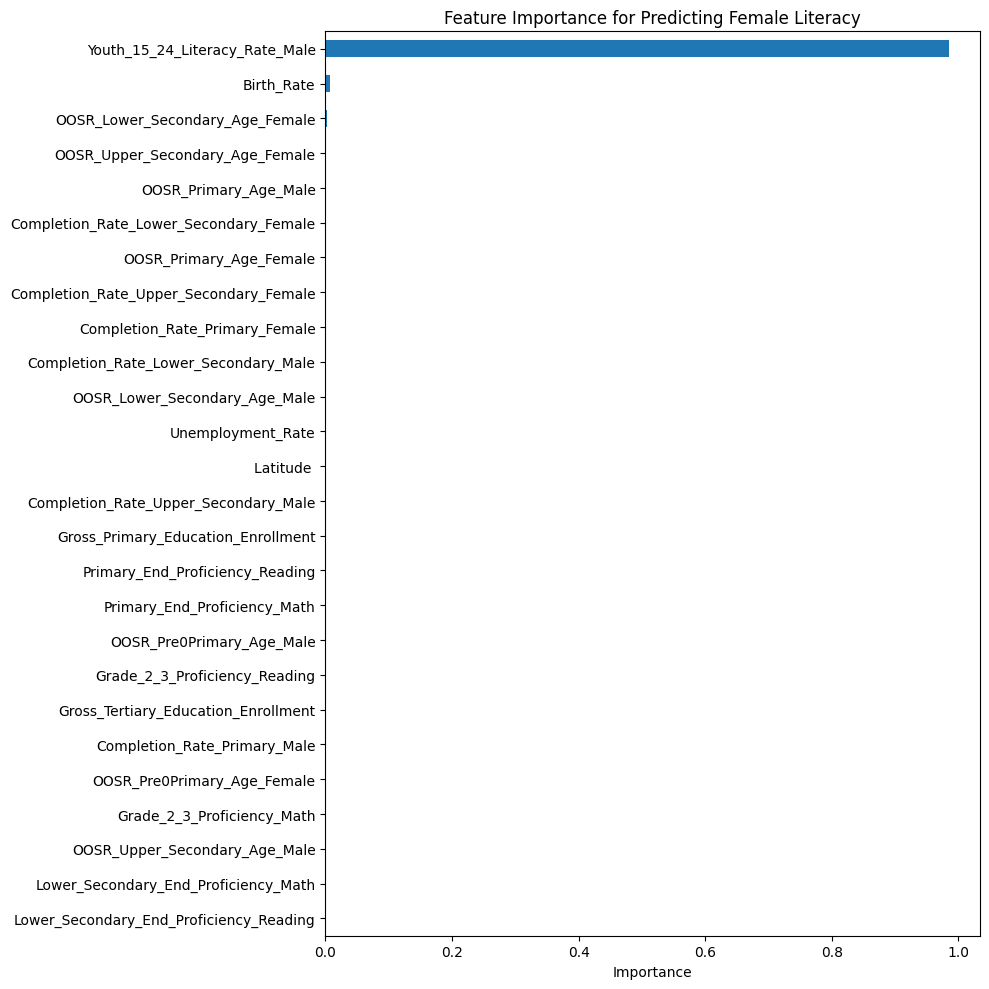

In [ ]:
columns_to_drop = ['Countries and areas', 'Latitude', 'Longitude', 'Youth_15_24_Literacy_Rate_Female']

# Only drop columns that exist in the DataFrame
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Define target variable
y = df['Youth_15_24_Literacy_Rate_Female']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.plot(kind='barh', figsize=(10, 10), title='Feature Importance for Predicting Female Literacy')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

19. Comparing Education Proficiency by Region Clustering

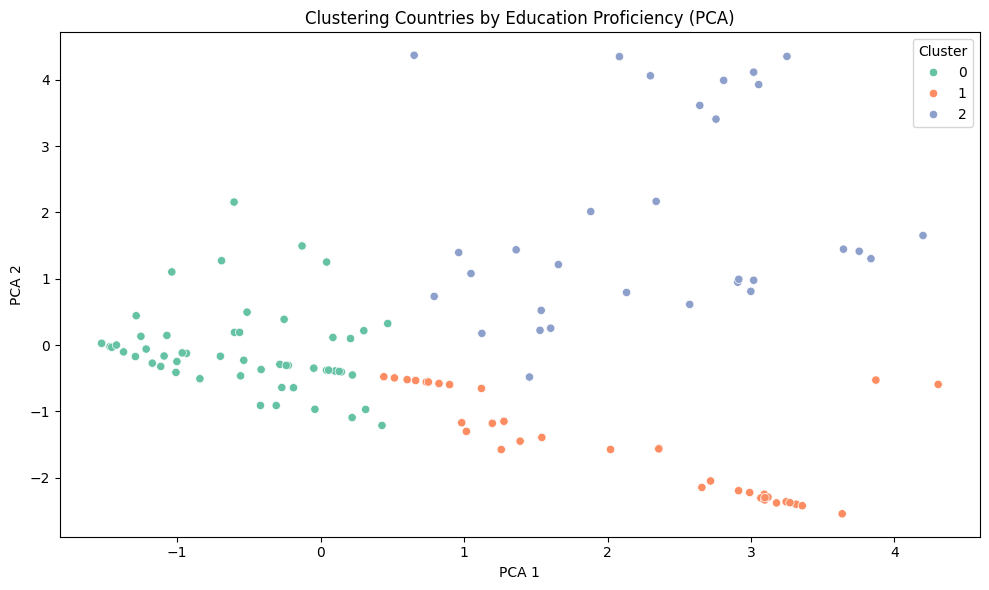

In [ ]:
X = df[['Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
        'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
        'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']]

X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['RegionCluster'] = clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clusters, palette='Set2')
plt.title('Clustering Countries by Education Proficiency (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

20. Correlation Network Graph Using NetworkX

<ipython-input-19-b23d22c470c9>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


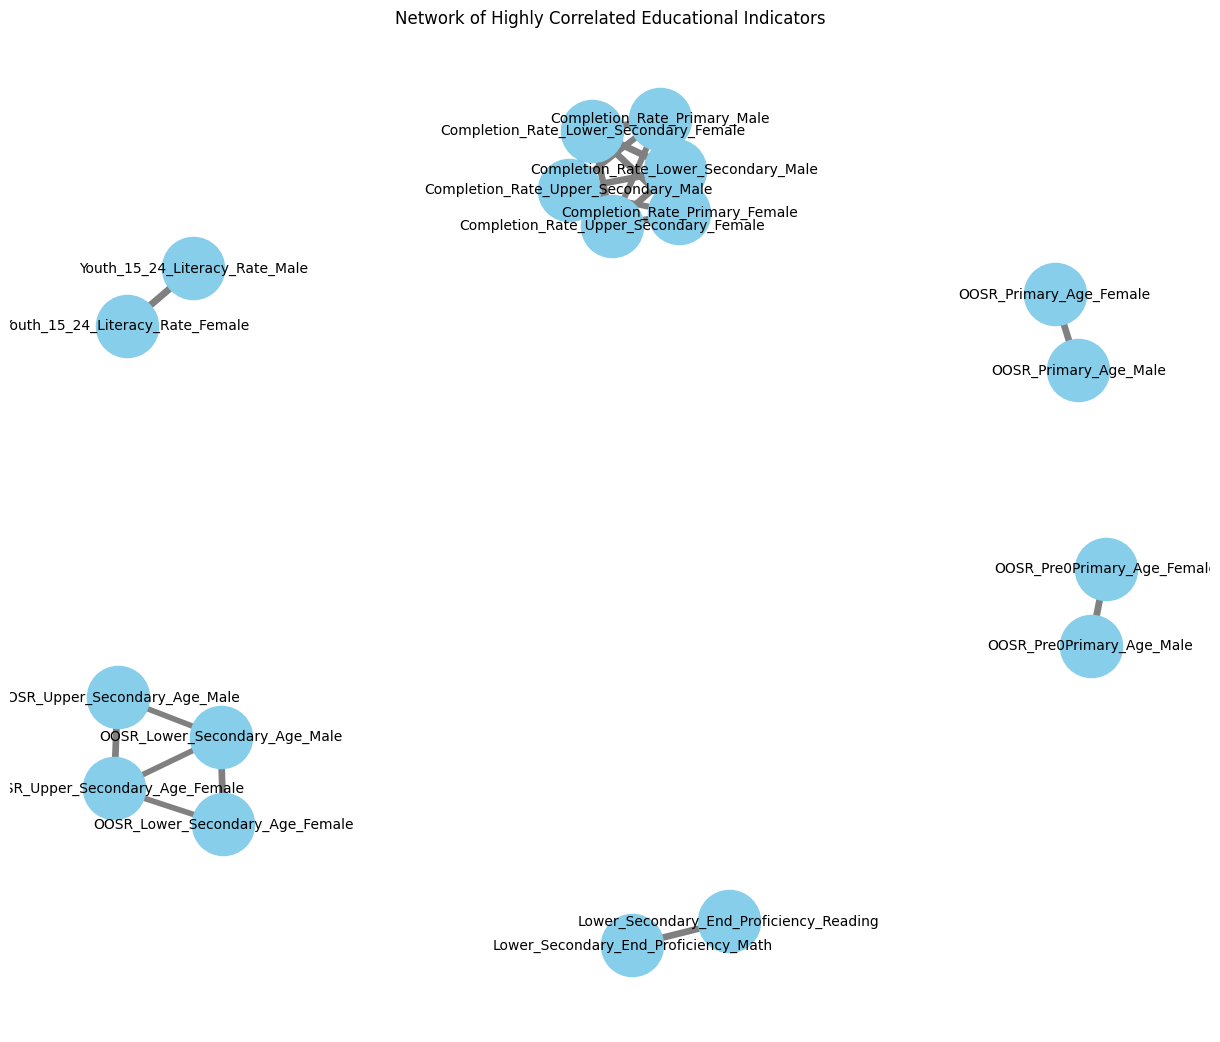

In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()
strong_corrs = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)].stack().reset_index()
strong_corrs.columns = ['Feature1', 'Feature2', 'Correlation']

G = nx.Graph()
for _, row in strong_corrs.iterrows():
    G.add_edge(row['Feature1'], row['Feature2'], weight=row['Correlation'])

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [d['weight']*5 for (u,v,d) in edges]
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, width=weights, edge_color='gray')
plt.title("Network of Highly Correlated Educational Indicators")
plt.tight_layout()
plt.show()

21. T-Test: Gender Disparity in Literacy Rates

In [ ]:
male = df['Youth_15_24_Literacy_Rate_Male']
female = df['Youth_15_24_Literacy_Rate_Female']

t_stat, p_val = ttest_rel(male, female)
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("Significant gender difference in literacy rates (p < 0.05).")
else:
    print("No significant gender difference in literacy rates.")

T-Statistic: 2.786, P-Value: 0.0058
Significant gender difference in literacy rates (p < 0.05).


22. ANOVA: Do Literacy Rates Vary by Education Completion Level

In [ ]:
group1 = df[df['Completion_Rate_Upper_Secondary_Female'] > 80]['Youth_15_24_Literacy_Rate_Female']
group2 = df[(df['Completion_Rate_Upper_Secondary_Female'] > 50) & (df['Completion_Rate_Upper_Secondary_Female'] <= 80)]['Youth_15_24_Literacy_Rate_Female']
group3 = df[df['Completion_Rate_Upper_Secondary_Female'] <= 50]['Youth_15_24_Literacy_Rate_Female']

f_stat, p_val = f_oneway(group1, group2, group3)
print(f"ANOVA F-Statistic: {f_stat:.3f}, P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("Literacy rates differ significantly by completion level group.")
else:
    print("No significant difference in literacy rates between groups.")

ANOVA F-Statistic: 5.202, P-Value: 0.0063
Literacy rates differ significantly by completion level group.


23. Variance Inflation Factor (VIF) for Multicollinearity

In [ ]:
features = df[['Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate']]
X = add_constant(features)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                              Variable        VIF
0                                const  11.481965
1   Gross_Primary_Education_Enrollment   1.126201
2  Gross_Tertiary_Education_Enrollment   1.095607
3                    Unemployment_Rate   1.056304


24. Linear Regression with Full Diagnostic Summary

In [ ]:
X = df[['Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate']]
y = df['Youth_15_24_Literacy_Rate_Female']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Youth_15_24_Literacy_Rate_Female   R-squared:                       0.032
Model:                                          OLS   Adj. R-squared:                  0.017
Method:                               Least Squares   F-statistic:                     2.159
Date:                              Tue, 08 Apr 2025   Prob (F-statistic):             0.0941
Time:                                      17:10:51   Log-Likelihood:                -1052.9
No. Observations:                               202   AIC:                             2114.
Df Residuals:                                   198   BIC:                             2127.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                                          coef    std err          t  

25. Principal Component Analysis: Variance Explained

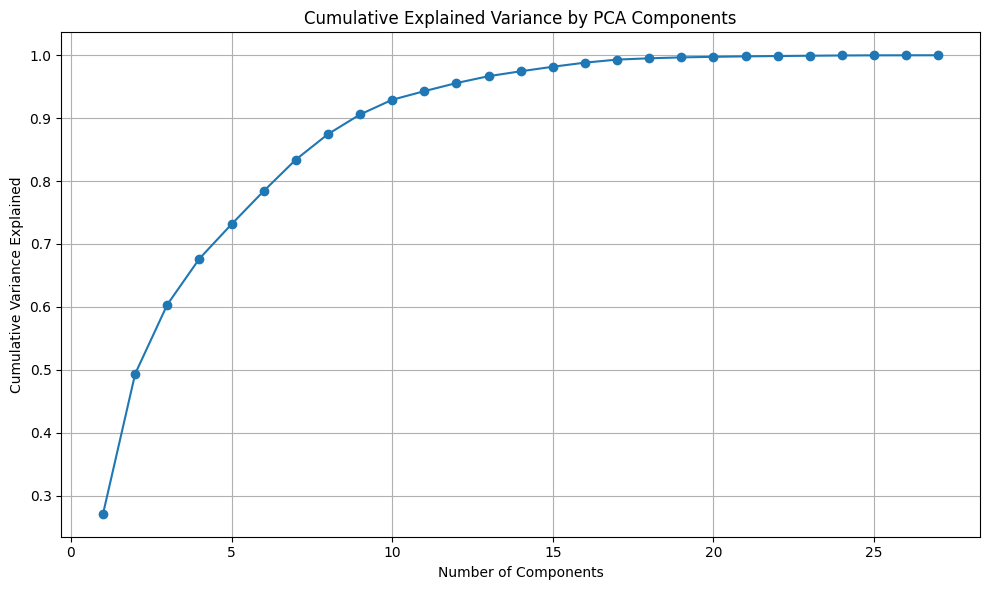

In [ ]:
cols_to_drop = ['Latitude', 'Longitude']
data = df.select_dtypes(include=['int64', 'float64']).drop(columns=[col for col in cols_to_drop if col in df.columns])

data_scaled = StandardScaler().fit_transform(data)

pca = PCA().fit(data_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

26. Gender Equality Index & Inequality Flags

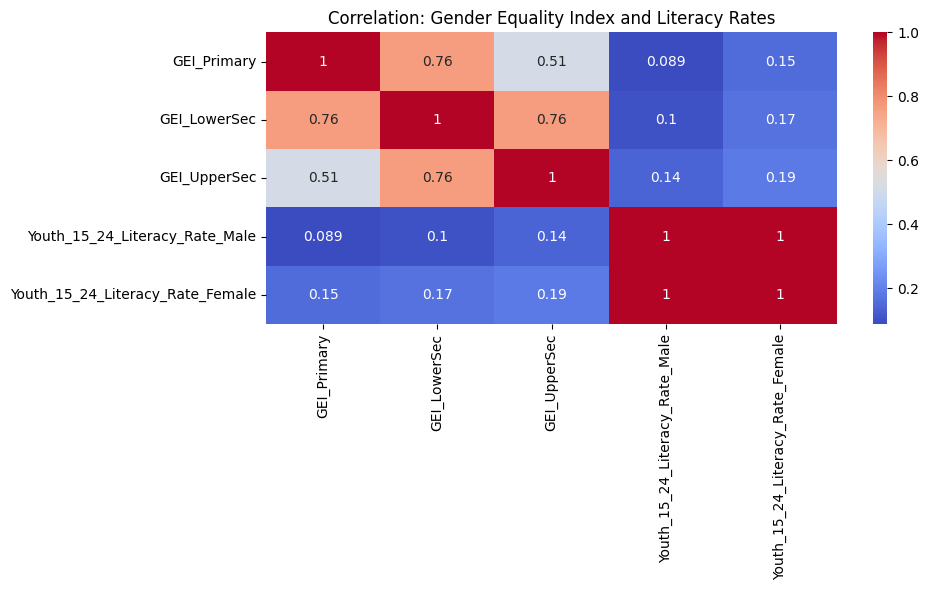

In [ ]:
df['GEI_Primary'] = df['Completion_Rate_Primary_Female'] / df['Completion_Rate_Primary_Male']
df['GEI_LowerSec'] = df['Completion_Rate_Lower_Secondary_Female'] / df['Completion_Rate_Lower_Secondary_Male']
df['GEI_UpperSec'] = df['Completion_Rate_Upper_Secondary_Female'] / df['Completion_Rate_Upper_Secondary_Male']

# Flag countries with extreme gender inequality (GEI < 0.8 or > 1.2)
inequality_only = df[['GEI_Primary', 'GEI_LowerSec', 'GEI_UpperSec']]
df['Extreme_Gender_Inequality'] = inequality_only.apply(lambda row: any((row < 0.8) | (row > 1.2)), axis=1)

# Proficiency growth: Lower Secondary vs. early grades
df['Proficiency_Growth_Reading'] = df['Lower_Secondary_End_Proficiency_Reading'] - df['Grade_2_3_Proficiency_Reading']
df['Proficiency_Growth_Math'] = df['Lower_Secondary_End_Proficiency_Math'] - df['Grade_2_3_Proficiency_Math']

# High education flag (literacy > 85% for both genders)
df['High_Edu_Country'] = ((df['Youth_15_24_Literacy_Rate_Female'] > 85) &
                          (df['Youth_15_24_Literacy_Rate_Male'] > 85)).astype(int)

plt.figure(figsize=(10, 6))
sns.heatmap(df[['GEI_Primary', 'GEI_LowerSec', 'GEI_UpperSec',
                'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation: Gender Equality Index and Literacy Rates')
plt.tight_layout()
plt.show()

27.Summary: Number of Countries with Extreme Gender Inequality

In [ ]:
extreme_inequality_count = df['Extreme_Gender_Inequality'].sum()
print(f"Number of countries with extreme gender inequality in education: {extreme_inequality_count}")

Number of countries with extreme gender inequality in education: 51


28.Logistic Regression to Predict High Education Countries

In [ ]:
features = ['GEI_Primary', 'GEI_LowerSec', 'GEI_UpperSec',
            'Proficiency_Growth_Reading', 'Proficiency_Growth_Math',
            'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment',
            'Unemployment_Rate', 'Birth_Rate']

X = df[features].fillna(0)
y = df['High_Edu_Country']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[36  4]
 [14  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        40
           1       0.64      0.33      0.44        21

    accuracy                           0.70        61
   macro avg       0.68      0.62      0.62        61
weighted avg       0.69      0.70      0.68        61



29.Random Forest Classifier for Feature Importance

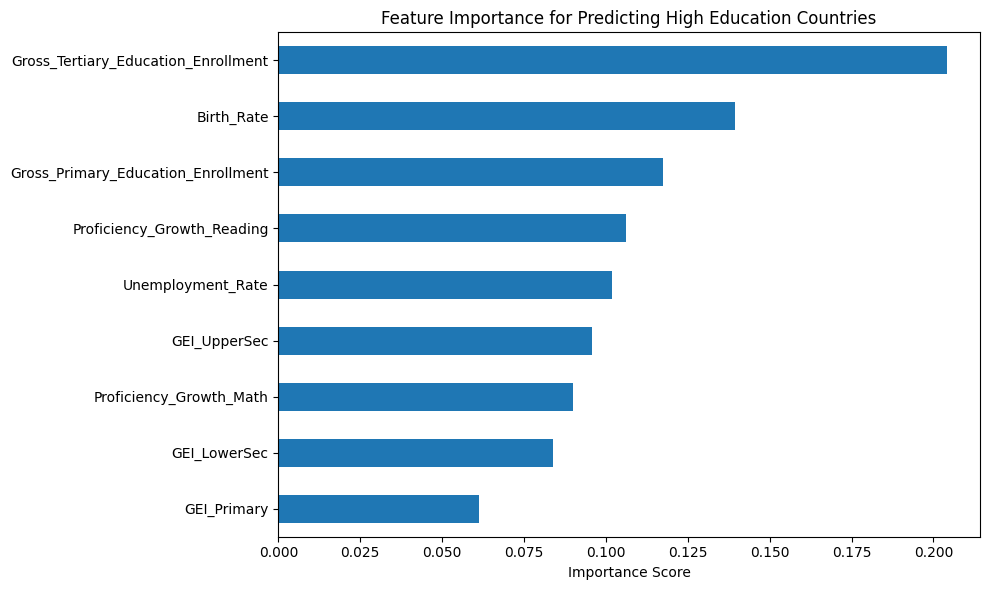

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.plot(kind='barh', figsize=(10,6), title='Feature Importance for Predicting High Education Countries')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

30.XGBoost Classifier to Predict High Education Countries

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.639344262295082
XGBoost ROC AUC: 0.5666666666666667


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:23:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The accuracy of 0.639 means that the XGBoost classifier correctly predicted the outcome for about 63.9% of the test cases, giving a general sense of overall correctness. However, accuracy can be misleading if the dataset is imbalanced (i.e., one class appears more than the other). The ROC AUC score of 0.567 indicates the model's ability to distinguish between the positive and negative classes; a value of 0.5 suggests no discrimination (random guessing), while 1.0 indicates perfect separation. In this case, a ROC AUC of 0.567 is only slightly better than chance, implying the model struggles to confidently rank predictions by their likelihood of being in the positive class, even if the accuracy seems acceptable.

31. SHAP Values for Model Interpretability

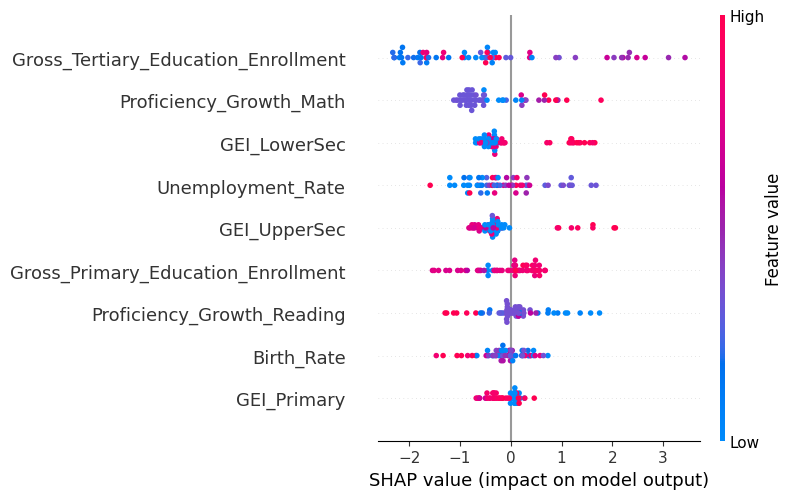

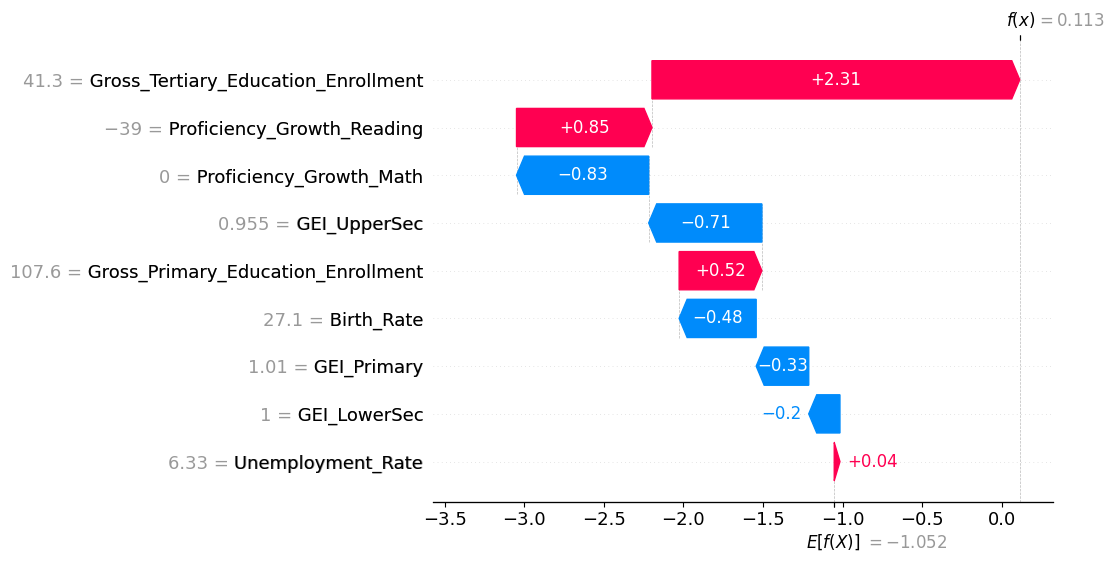

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
# Global feature importance
shap.summary_plot(shap_values, X_test)
# Local explanation for a single prediction
shap.plots.waterfall(shap_values[0], max_display=10)

32.Association Rule Mining

In [8]:
# Create binary features
assoc_df = pd.DataFrame()
assoc_df['High_Literacy'] = ((df['Youth_15_24_Literacy_Rate_Female'] > 85) &
                             (df['Youth_15_24_Literacy_Rate_Male'] > 85))
assoc_df['Low_Unemployment'] = df['Unemployment_Rate'] < 5
assoc_df['High_Tertiary_Enroll'] = df['Gross_Tertiary_Education_Enrollment'] > 50
assoc_df['Low_Birth_Rate'] = df['Birth_Rate'] < 15
assoc_df['High_Completion'] = df['Completion_Rate_Upper_Secondary_Female'] > 80

# Apply Apriori algorithm
frequent_itemsets = apriori(assoc_df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Sort and display rules
rules.sort_values('confidence', ascending=False, inplace=True)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                antecedents  \
3  (Low_Unemployment, High_Tertiary_Enroll)   
1                    (High_Tertiary_Enroll)   
0                          (Low_Birth_Rate)   
2        (Low_Unemployment, Low_Birth_Rate)   
5                    (High_Tertiary_Enroll)   
4                          (Low_Birth_Rate)   

                                consequents   support  confidence      lift  
3                          (Low_Birth_Rate)  0.123762    0.862069  1.934866  
1                          (Low_Birth_Rate)  0.262376    0.815385  1.830085  
0                    (High_Tertiary_Enroll)  0.262376    0.588889  1.830085  
2                    (High_Tertiary_Enroll)  0.123762    0.490196  1.523379  
5        (Low_Unemployment, Low_Birth_Rate)  0.123762    0.384615  1.523379  
4  (Low_Unemployment, High_Tertiary_Enroll)  0.123762    0.277778  1.934866  


The association rules analysis detects key relationships among variables: low birth rates are closely linked with high tertiary enrollment and low unemployment, with the highest rule (Antecedents: Low_Unemployment + High_Tertiary_Enroll → Consequent: Low_Birth_Rate) featuring high confidence (86.2%) and lift (1.93), suggesting a strong predictive relationship. Conversely, low birth rates alone or together with low unemployment forecast less notably to high tertiary enrollment (confidence: 49-59%, lift: ~1.5), revealing weaker or contrary dynamics. Notably, high tertiary enrollment also forecasts low birth rates (confidence: 81.5%, lift: 1.83), again affirming education's relationship with demographic change. Lower-confidence rules (for example, unemployment and birth rates forecasting tertiary enrollment) reveal more intricate or mediated relationships.

33.Compare Model Performances

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.3f}, ROC AUC = {auc:.3f}")

Logistic Regression: Accuracy = 0.705, ROC AUC = 0.617
Random Forest: Accuracy = 0.705, ROC AUC = 0.617
Gradient Boosting: Accuracy = 0.590, ROC AUC = 0.518
XGBoost: Accuracy = 0.639, ROC AUC = 0.567
SVM: Accuracy = 0.656, ROC AUC = 0.500


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Both Logistic Regression and Random Forest performed the best among the models, each achieving an accuracy of 70.5% and a ROC AUC of 0.617. This means they correctly predicted the outcome 70.5% of the time, and they have a fair ability to distinguish between classes — better than random but still far from ideal. XGBoost had lower performance with 63.9% accuracy and ROC AUC of 0.567, suggesting it was less reliable overall and weaker at ranking class probabilities. Gradient Boosting performed the worst, with only 59.0% accuracy and a ROC AUC of 0.518, which is barely above random guessing. Overall, Logistic Regression and Random Forest are your most effective models so far, with better balance between accuracy and discriminative power, while Gradient Boosting and XGBoost may require tuning or more informative features to be competitive.